In [61]:
import os, subprocess
import pandas as pd
from tqdm.notebook import tqdm
from multiprocessing import Pool

In [42]:
def run(step_size=0.001, distance=1):
    args = ' '.join([
        './a.out',
        '1 1', str(step_size), 
        f'0 0 {str(-distance/2)} 0 0 0 1',
        f'0 0 {str(distance/2)} 0 0 0 1'
    ])

    out = subprocess.run(args.split(' '), text=True, capture_output=True)
    return [float(_) for _ in out.stdout.split('\n')[-2].split(':')[1].split(',')]

In [81]:
r = []
def f(i) :
    v = 0.0000001*i
    return (v, run(v)[-1])
    r.append((v, run(v)[-1]))

with Pool(8) as p:
    r = [_ for _ in tqdm(p.imap_unordered(f, range(1,10000)), total=9999)]

  0%|          | 0/9999 [00:00<?, ?it/s]

<AxesSubplot:xlabel='step_size'>

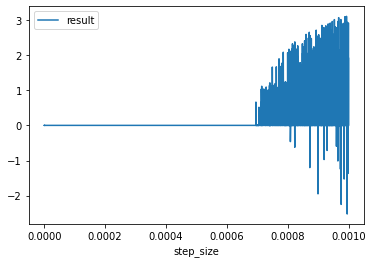

In [82]:
pd.DataFrame(r, columns=['step_size', 'result']).set_index('step_size').plot()